In [65]:
#libraries 
import os
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#accuracy measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [66]:
#path = '/Users/mustakimsunny/Desktop/ML/hasin_SGI_project/sgi_project/data/'
path = 'C:\\Users\\muhelal\\Desktop\\git_test\\data\\'
file = 'TRY Agian 2.0.xlsx'
dataset = pd.read_excel(path + file)

In [67]:
#check null values at each feature column
dataset.isna().sum()

CASENO       164
CTRLSECT     164
ATKM         164
SEVERITY     164
NOVEH        164
VEHNO        164
ACCDATE      164
ACCTIME      164
NOINJ        164
NOKILLED     164
COMMNAME     174
ACCCOST      164
NATLIGHT     388
ARTLIGHT    2211
WEATHER     4027
ROADSURF    1147
ROADCOND    4461
ACCSITE      275
CONFIG       164
DRVSEX       798
DRVAGE       930
ROADCHAR    2315
VERT        2134
VIDENT       328
VEHYEAR     1069
MCF1         455
CONTROLS     326
SEQ1         218
dtype: int64

In [68]:
#only keep the rows with 'VEHNO' == 1
dataset = dataset.loc[dataset['VEHNO'] == 1]

In [69]:
#handle missing values
#dataset = dataset.dropna()
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

In [75]:
def convert_to_cat(dataset, *arg):
    for column in arg:
        dataset[column] = dataset[column].astype('category')
        dataset[column] = dataset[column].cat.codes
        
    return dataset
dataset = convert_to_cat(dataset, 'CTRLSECT', 'COMMNAME', 'NATLIGHT', 'ARTLIGHT', 
                         'WEATHER','ROADCOND','DRVSEX', 'ROADCHAR', 'VERT', 'VEHYEAR')   

In [13]:
#seperate target col from other features to see feature importance
#X = dataset.drop(['MCF1','ACCDATE', 'CASENO'], axis=1)  #independent columns
#y = dataset['MCF1']    #target column i.e price range

#seperate target col from other features to see feature importance
#X = dataset.drop(['CONFIG','ACCDATE', 'CASENO'], axis=1)  #independent columns
#y = dataset['CONFIG']    #target column i.e price range

#seperate target col from other features to see feature importance
#X = dataset.drop(['COMMNAME','ACCDATE', 'CASENO'], axis=1)  #independent columns
#y = dataset['COMMNAME']    #target column i.e price range

#seperate target col from other features to see feature importance
X = dataset.drop(['ACCSITE', 'ACCDATE', 'CASENO'], axis=1)  #independent columns
y = dataset['ACCSITE']    #target column i.e price range

In [14]:
#univariate selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

       Specs         Score
9    ACCCOST  2.775696e+06
15    CONFIG  1.206730e+04
5    ACCTIME  1.200209e+04
0   CTRLSECT  1.174175e+04
24      SEQ1  6.713696e+03
23  CONTROLS  6.127575e+03
8   COMMNAME  5.693951e+03
1       ATKM  1.120475e+03
22      MCF1  1.002598e+03
6      NOINJ  8.657468e+02
11  ARTLIGHT  7.622897e+02
3      NOVEH  5.047707e+02
19      VERT  4.752324e+02
17    DRVAGE  3.882856e+02
20    VIDENT  3.882841e+02
10  NATLIGHT  3.020145e+02
12   WEATHER  1.706851e+02
7   NOKILLED  1.312933e+02
14  ROADCOND  1.067126e+02
13  ROADSURF  8.537867e+01


C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.06375164 0.06673914 0.01396412 0.01875478 0.         0.06250469
 0.01743617 0.00258211 0.06218988 0.05843996 0.02748468 0.01944478
 0.0201262  0.02572588 0.00897257 0.13085647 0.01659087 0.06318332
 0.02374089 0.00955707 0.04717253 0.06025531 0.0488701  0.0934793
 0.03817752]


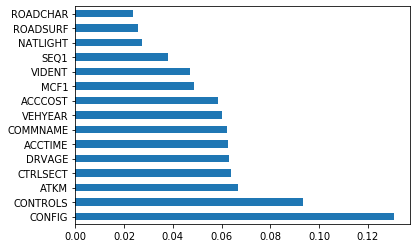

In [16]:
#feature importance


model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#plt.savefig("out.png")

In [36]:
#steps
#1. load data
#2. drop cols right away with only one class value
#3. fill with most frequent vals for the remaining cols
#4. label encode necessary cols
#5. check feature importance 
#6. drop cols those are not important after feature engineering
#7. check class balance for the cols that are kept
#8. K-fold cross validation/random sampling/stratified sampling etc. must be used 

# so far the following columns are to be kept:
#CONFIG, SEQ1, DRVAGE, COMMNAME,CTRLSECT,VEHYEAR, ATKM, ACCCOST,ROADSURF,VIDENT, NATLIGHT, WEATHER,NOVEH, ACCSITE,ROADCHAR,DRVSEX,
#ROADCOND,CONTROLS,SEVERITY,VERT,ACCTIME, NOINJ

In [76]:
#drop cols that are not important after feature engineering
def drop_cols(dataframe,*arg):
    columns = list(arg)
    dataframe = dataframe.drop(columns, axis=1)
    return dataframe

dataset = drop_cols(dataset, 'ACCDATE', 'CASENO', 'SEVERITY', 'VEHNO', 'NOINJ', 'NOKILLED', 'ARTLIGHT', 
                    'ROADSURF', 'ROADCOND', 'ACCSITE', 'DRVSEX', 'ROADCHAR', 'VERT', 'VIDENT', 'CONTROLS')

dataset_mcf1 = drop_cols(dataset, 'CONFIG', 'COMMNAME')
dataset_config = drop_cols(dataset, 'COMMNAME')

In [77]:
#dataset_config

#see target col's class counts and it is highly imbalanced
dataset_config['CONFIG'].value_counts()

#see target col's class counts and it is highly imbalanced
#dataset_mcf1['MCF1'].value_counts()

1.0     10728
4.0      3005
2.0      1583
5.0      1028
16.0      781
3.0       630
9.0       562
6.0       441
7.0       300
8.0       232
14.0      139
13.0      124
11.0       95
12.0       45
10.0       33
15.0       29
Name: CONFIG, dtype: int64

In [78]:
def balance_dataset(dataset, column, frequency_val):
    count = dataset[column].value_counts()
    classes = [key for key,val in count.items()]
    df_majority = dataset.loc[dataset[column] == classes[0]]
    
    all_minor_dfs = []
    for val in classes[1:]:
        all_minor_dfs.append(dataset.loc[dataset[column] == val])
    
    # Upsample minority class
    all_minor_dfs_upsampled = []
    for val in all_minor_dfs:
        df_minority_upsampled = resample(val, 
                                     replace=True,     # sample with replacement
                                     n_samples=frequency_val,    # to match majority class
                                     random_state=123) # reproducible results
        all_minor_dfs_upsampled.append(df_minority_upsampled)
        
    #concatenate majority class with matching upsampled classes
    #for df in all_minor_dfs_upsampled:
    df_balanced = pd.concat([df_majority, all_minor_dfs_upsampled[0]])
    for df in all_minor_dfs_upsampled[1:]:
        df_balanced = pd.concat([df_balanced, df])
    
    df_balanced = shuffle(df_balanced)
    return df_balanced

In [79]:
dataset_balanced_mcf1 = balance_dataset(dataset_mcf1, 'MCF1',10420)
dataset_balanced_config = balance_dataset(dataset_config, 'CONFIG',10728)

In [80]:
dataset_balanced_config

CTRLSECT   ATKM  NOVEH  ACCTIME  ACCCOST  NATLIGHT  WEATHER  CONFIG  \
4377        763   1.07    2.0   1440.0  15000.0         0        0    12.0   
14895       354  22.79    2.0   1300.0   6911.0         0        0    12.0   
13988       373   8.75    2.0   1600.0  15000.0         0        0    12.0   
9488        387   2.00    1.0   1200.0   2500.0         0        5     4.0   
5388        432  39.37    1.0   2100.0   2500.0         0        2     1.0   
...         ...    ...    ...      ...      ...       ...      ...     ...   
19804        17  17.59    2.0    740.0   5712.0         0        0    10.0   
22950        25  18.66    1.0   1530.0   2500.0         0        6     2.0   
14191       314  26.00    1.0   1445.0   2500.0         0        2     2.0   
8162        373  52.50    2.0   1451.0   2500.0         0        0    13.0   
3677        218   8.16    1.0   1722.0   7500.0         0        4     3.0   

       DRVAGE  VEHYEAR  MCF1  SEQ1  
4377     16.0       41  21.0   1.0  
14895    27.0       48  21.0   1.0  
13988    27.0       31  99.0   1.0  
9488     16.0       33   7.0  50.0  
5388     53.0       44  60.0   2.0  
...       ...      ...   ...   ...  
19804    35.0       45  75.0   1.0  
22950    29.0       42  67.0  54.0  
14191    51.0       40  74.0  54.0  
8162     21.0       27  26.0   1.0  
3677     38.0       42  74.0  50.0  

[171648 rows x 12 columns]

In [81]:
def split_train_test(dataframe, target):
    train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)
    X_train, X_test = train_set.drop(target, axis=1), test_set.drop(target, axis=1)
    y_train, y_test = train_set[target], test_set[target]
    
    return X_train, X_test, y_train, y_test 

X_train_mcf, X_test_mcf, y_train_mcf, y_test_mcf = split_train_test(dataset_balanced_mcf1, 'MCF1')
X_train_config, X_test_config, y_train_config, y_test_config = split_train_test(dataset_balanced_config, 'CONFIG')

In [82]:
def fit_predict(X_train, X_test, y_train, y_test):
    #algorithms = [KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), GaussianNB()]
    model =RandomForestClassifier()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_tain_pred = model.predict(X_train)
    
    return y_tain_pred,y_test_pred    

In [83]:
y_train_pred_mcf, y_test_pred_mcf = fit_predict(X_train_mcf, X_test_mcf, y_train_mcf, y_test_mcf)
y_train_pred_config, y_test_pred_config = fit_predict(X_train_config, X_test_config, y_train_config, y_test_config)

C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


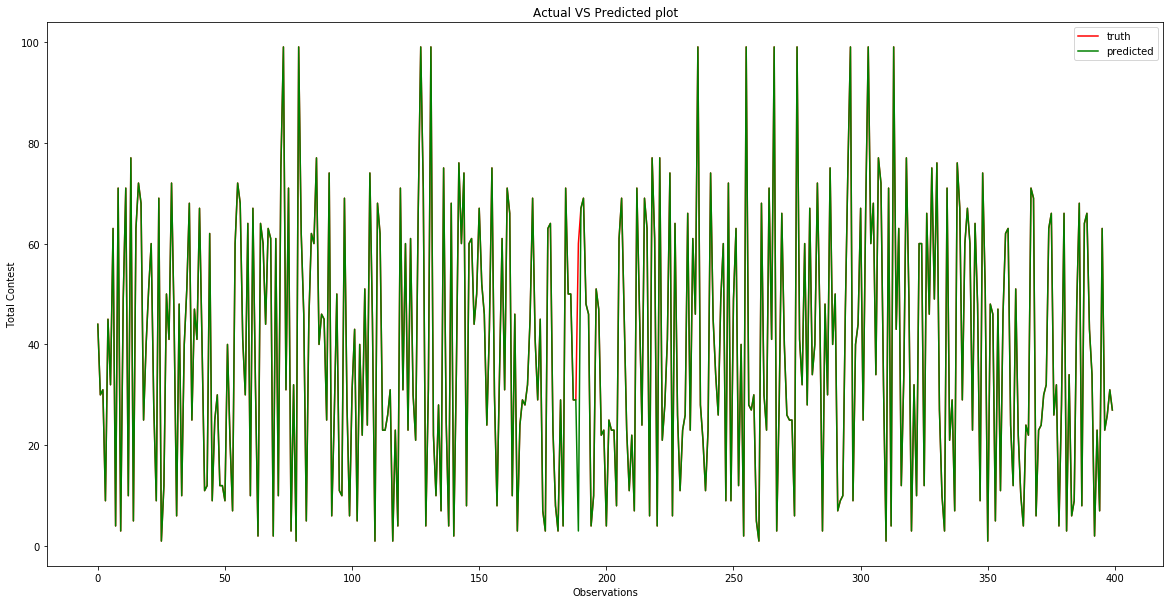

In [87]:
#plot the actual VS predicted values
x = []
for i in range(400):
    x.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(x, y_test_mcf[100:500], label = "truth", color='red')
plt.plot(x, y_test_pred_mcf[100:500], label = "predicted", color='green')

plt.xlabel('Observations')
plt.ylabel('Total Contest')
plt.title('Actual VS Predicted plot')
plt.legend()

#plt.show()

In [85]:
def model_accuracy_stat(y_test, y_test_pred, y_train, y_train_pred):
    print('test accuracy: ', accuracy_score(y_test,y_test_pred))
    print('train accuracy: ', accuracy_score(y_train, y_train_pred))
    #print(classification_report(y_test, y_test_pred))
    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))

In [86]:
model_accuracy_stat(y_test_mcf, y_test_pred_mcf, y_train_mcf, y_train_pred_mcf)
model_accuracy_stat(y_test_config, y_test_pred_config, y_train_config, y_train_pred_config)

test accuracy:  0.9991036830478398
train accuracy:  0.9999909462934126
confusion matrix: 
 [[2088    0    0 ...    0    0    0]
 [   0 2163    0 ...    0    0    0]
 [   0    0 2019 ...    0    0    0]
 ...
 [   0    0    0 ... 2125    0    0]
 [   0    0    0 ...    0 2114    0]
 [   1    0    0 ...    0    0 2025]]
test accuracy:  0.9962714826682202
train accuracy:  0.9998761997698772
confusion matrix: 
 [[2113   20    2   43    0    0    0    0    0    0    0    0    0    0
     0    2]
 [   0 2151    0    6    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0 2137    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   9   38    8 2110    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0 2148    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0 2128    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0 2086    0    0    0    0    0    0    0
     0  

In [88]:
def k_fold_cross_validation(num_of_folds, X_train, y_train):
    # check the same model with k-fold cross validation to make sure model is not overfitting
    model = RandomForestClassifier()
    cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=num_of_folds)
    
    print(cv_score)
    

In [89]:
k_fold_cross_validation(10, X_train_mcf, y_train_mcf)

C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

[0.99788607 0.9970791  0.99716185 0.99709963 0.99812846 0.99710265
 0.9962078  0.99711272 0.99609667 0.99711237]


In [ ]:
accuracy_rate = []
training_acc = []

for i in range(1,50):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))
#plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,50), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,50), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

#blue - trianing accuracy 
# red - testing accuracy

In [61]:
#next steps
#CONFIG, ATKM, COMNAME to be predicted as well

#next train the dataset based on CTRLSECT

#so far doesn't seem to have any overfitting since the cross validation scores are very close to each other
#AUC curve test needs to be done for further assurance
